In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from datetime import date
from datetime import datetime

import seaborn as sns
import pandas as pd
import numpy as np
import calendar

pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read in data for Seattle and Boston

df_b_cal = pd.read_csv('calendar_boston.csv')
df_b_lis = pd.read_csv('listings_boston.csv')
df_s_cal = pd.read_csv('calendar_seattle.csv')
df_s_lis = pd.read_csv('listings_seattle.csv')

In [6]:
df_b_cal.head(3)

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


In [7]:
df_b_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [8]:
df_s_cal.head(3)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN


In [9]:
df_s_lis.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [10]:
print('Boston calendar dataFrame shape :', df_b_cal.shape)
print('Boston listings dataFrame shape :', df_b_lis.shape)

print('Seattle calendar dataFrame shape :', df_s_cal.shape)
print('Seattle listings dataFrame shape :', df_s_lis.shape)

Boston calendar dataFrame shape : (1308890, 4)
Boston listings dataFrame shape : (3585, 95)
Seattle calendar dataFrame shape : (1393570, 4)
Seattle listings dataFrame shape : (3818, 92)


In [11]:
df_b_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [12]:
df_b_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [13]:
df_s_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [14]:
df_s_lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [15]:
def preprocess_cal(df):
    
    # convert and exact month, year
    df['date'] = pd.to_datetime(df['date'])
    df['month']=df.date.dt.month.apply(lambda x: calendar.month_abbr[x])
    
    # convert price
    df['price']=df['price'].str.replace('$', '')
    df['price']=df['price'].str.replace(',', '')
    df['price']=pd.to_numeric(df['price'])
    
    return df

In [16]:
def group_plot_cal(df,cityname):
    
    # list on months
    months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
   
    # calculate monthly price - grouping by month and average price
    df_monthly_price = df.groupby(['month'])['price'].mean().to_frame(name='avg_price').reset_index()

    # mapping average calculation with each listed month 

    m = {month: i for i, month in enumerate(months)}
    key_s = df_monthly_price['month'].map(m)      
    df_monthly_price = df_monthly_price.iloc[key_s.argsort()]
    
    x_axis = df_monthly_price['month']
    y_axis = df_monthly_price['avg_price']
    plt.title('Average price by month in ' + cityname)
    plt.xlabel('Months')
    plt.ylabel('Price($)')
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,y_axis)
    savefig('test.png', bbox_inches='tight')
    plt.show()
    

In [17]:
df_b_cal = preprocess_cal(df_b_cal)
df_s_cal = preprocess_cal(df_s_cal)

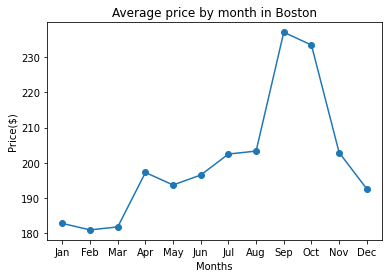

In [18]:
group_plot_cal(df_b_cal,'Boston')

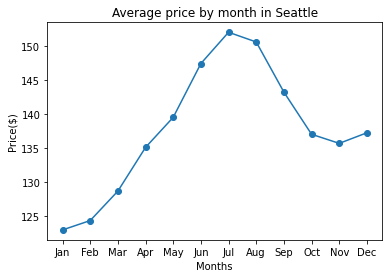

In [19]:
group_plot_cal(df_s_cal,'Seattle')

In [20]:
def check_convert_price(df):
    
    # format and convert price
    if type(df.price[0]) == str:
        df.price = df.price.apply(lambda x: float(x[1:].replace(',', '')))
    
    # plot the distribution of price
    
    plt.figure(figsize=(12,4))
    plt.title('Distribution of the Price')
    plt.hist(df.price,bins = np.linspace(0,1000,100))
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()
    
    return df

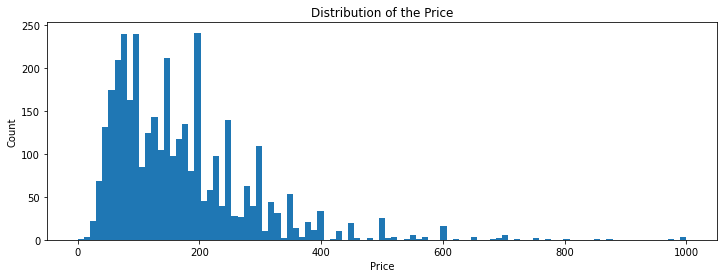

In [21]:
df_b_lis = check_convert_price(df_b_lis)

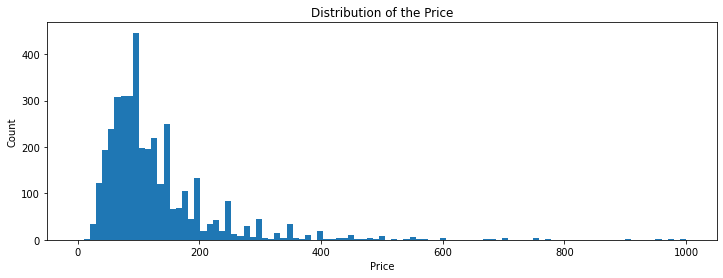

In [22]:
df_s_lis = check_convert_price(df_s_lis)

In [23]:
def preprocess_lis(df_list,df_cal):
    
    # merge listing and calendar dataframe
    
    df_list = df_list.rename(index=str, columns={"id": "listing_id"})
    df = pd.merge(df_cal, df_list, on = 'listing_id')
    
    df = df.dropna(subset=['price_x'])
    df['price'] = df['price_x'].astype(str)
    df['price'] = df['price'].str.replace("[$, ]", "").astype(float)
    df = df.drop(columns = ['price_x'])
    
    # remove price outliers - dropping price greater than $500 
    
    drop_idx = df[df.price > 500].index
    df.drop(drop_idx, axis = 0, inplace = True)
    
    # drop unnecessary columns
    
    for col in ['house_rules','price_y', 'access', 'interaction']:
        try:
            df = df.drop(columns=col)
        except KeyError:
            pass
    
    df.drop(['host_id','host_location','host_acceptance_rate','host_neighbourhood',
                       'host_total_listings_count', 'weekly_price', 'monthly_price',
                       'calendar_updated','listing_url','last_scraped','scrape_id', 'name', 'summary',
                       'space','description','experiences_offered','neighbourhood', 'neighbourhood_cleansed',
                       'zipcode','neighborhood_overview','notes', 'transit','thumbnail_url', 'medium_url',
                       'picture_url', 'xl_picture_url',  'host_url', 'host_name', 'host_about','host_thumbnail_url',
                       'host_picture_url','city', 'state',  'market','smart_location', 'country_code', 'country', 'square_feet','has_availability','availability_30', 
                       'availability_60', 'availability_90','availability_365', 'calendar_last_scraped',
                       'first_review', 'last_review','requires_license','license', 'jurisdiction_names','host_verifications','neighbourhood_group_cleansed',
                       'host_has_profile_pic', 'host_identity_verified', 'street','require_guest_profile_picture',
                       'require_guest_phone_verification','host_is_superhost', 'is_location_exact',
                       'instant_bookable','date','host_since','listing_id'], axis = 1, inplace = True)
    
    # get and drop the columns happing 50% of null values
    
    na_val = df.isnull().sum()/len(df)
    drop_idx = na_val[na_val > 0.5].index
    
    df.drop(drop_idx, axis = 1, inplace = True)
    
    # pre-process other columns
    
    df['cleaning_fee'] = df['cleaning_fee'].replace( '[$,]','', regex=True ).astype(float)
    df['extra_people'] = df['extra_people'].replace( '[$,]','', regex=True ).astype(float)
    df['available'] = df['available'].map(lambda x: 1 if x=="t" else 0)
    df['host_response_rate'] = df['host_response_rate'].replace( '%','', regex=True ).astype(float)
    
    # converting host_response_rate into number and filling in missing values
    df['host_response_rate_num'] = df['host_response_rate'].astype(str)
    df['host_response_rate_num'] = df['host_response_rate_num'].str.replace("%", "").astype("float")
    df['host_response_rate_num'].fillna(df['host_response_rate_num'].mean(), inplace = True)
    
    df['host_response_rate_buckets'] = pd.qcut(df['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
    
    df = df.drop(columns = ['host_response_rate', 'host_response_rate_num'])
    
    # impute missing values
    
    df['host_listings_count'].fillna(df['host_listings_count'].mean(), inplace = True)
    df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
    df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])
    df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
    
    df['extra_people_fee'] = df.apply(lambda row: 1 if row['extra_people'] == '$0.00' else 0, axis=1)
    df = df.drop(columns = ['extra_people'])
    
    col_list = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']
    
    for col in col_list:
        df[col].fillna(df[col].mean(), inplace = True)
    
    df=df.dropna(axis=0)
    
    return df  

In [24]:
df_boston = preprocess_lis(df_b_lis,df_b_cal)

In [25]:
df_seattle = preprocess_lis(df_s_lis,df_s_cal)

In [26]:
df_boston.head(3)

,available,month,host_response_time,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month,price,host_response_rate_buckets,extra_people_fee
365,1,Aug,within an hour,1,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",10.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,1,1.3,65.0,1,0
366,1,Aug,within an hour,1,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",10.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,1,1.3,65.0,1,0
367,1,Aug,within an hour,1,42.286241,-71.134374,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",10.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,moderate,1,1.3,65.0,1,0


In [27]:
df_seattle.head(3)

,available,month,host_response_time,host_listings_count,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,calculated_host_listings_count,reviews_per_month,price,host_response_rate_buckets,extra_people_fee
365,1,Jan,within an hour,6.0,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",40.0,1,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,1.48,125.0,1,0
366,1,Jan,within an hour,6.0,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",40.0,1,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,1.48,125.0,1,0
370,1,Jan,within an hour,6.0,47.639123,-122.365666,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",40.0,1,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict,6,1.48,125.0,1,0


In [28]:
def preprocess_amenities(df):
    
    # preprocessing amenities & creating a dataframe
    
    amenities = df['amenities'].map(lambda d: [amenity.replace('"', "").replace("{", "").replace("}", "") for amenity in d.split(",")])
    df['amenities'] = amenities
   
    possible_amenities = set([item for sublist in amenities for item in sublist])
    possible_amenities = list(possible_amenities)
    del possible_amenities[0]
    print("There are {} amenities in total.".format(len(possible_amenities)))
    
    mlb = MultiLabelBinarizer()
    amenities_result = pd.DataFrame(mlb.fit_transform(df['amenities']),columns=mlb.classes_, index=df.index)
    df = pd.concat([df, amenities_result], axis=1, sort = False)
    df.drop(['amenities',''], axis = 1, inplace = True)
    
    return df,possible_amenities

In [29]:
df_boston,b_possible_amenities = preprocess_amenities(df_boston)
df_seattle,s_possible_amenities = preprocess_amenities(df_seattle)

There are 45 amenities in total.
There are 40 amenities in total.


In [30]:
def create_dummy(df):
    cat_cols = list(df.select_dtypes(include=['object']).columns)
    for col in  cat_cols:
        df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=True)], axis=1)
    
    return df

In [31]:
df_boston = create_dummy(df_boston)

In [32]:
df_seattle = create_dummy(df_seattle)

In [33]:
df_boston.head(3)

,available,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price,host_response_rate_buckets,extra_people_fee,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Free Parking on Street,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Paid Parking Off Premises,Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month_nan,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Condominium,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Townhouse,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_nan
365,1,1,42.286241,-71.134374,2,1.0,1.0,1.0,10.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.3,65.0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
366,1,1,42.286241,-71.134374,2,1.0,1.0,1.0,10.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.3,65.0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
367,1,1,42.286241,-71.134374,2,1.0,1.0,1.0,10.0,0,2,15,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.3,65.0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [34]:
df_seattle.head(3)

,available,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price,host_response_rate_buckets,extra_people_fee,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Wheelchair Accessible,Wireless Internet,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,month_nan,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Yurt,property_type_nan,room_type_Private room,room_type_Shared room,room_type_nan,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,bed_type_nan,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan
365,1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,40.0,1,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,125.0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
366,1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,40.0,1,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,125.0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
370,1,6.0,47.639123,-122.365666,4,1.0,1.0,1.0,40.0,1,2,90,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48,125.0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [35]:
def scores_(y,x):
    print('Mean Absolute Error (MAE) :', mean_absolute_error(y, x))
    print('Mean Squared Error (MSE):', mean_squared_error(y, x))
    print('Root Mean Square Error (RMSE) :', np.sqrt(mean_squared_error(y, x)))
    print('R2 Score:' ,r2_score(y,x))

In [36]:
def plot_price_feature_importance(df,grid_search):
    
    feature_importances = grid_search.best_estimator_._final_estimator.feature_importances_
    features = sorted(zip(feature_importances, df.columns), reverse=True)
    parameters = []
    coefs = []
    for feature in features:
        parameters.append(feature[1]) 
        coefs.append(feature[0])
    
    plt.figure(figsize=(12,4))
    plt.bar(parameters[:20], height=coefs[:20])
    plt.xticks(rotation=90)
    plt.xlabel('feature')
    plt.ylabel('feature importance')
    plt.title('feature importance for the Top 20 features')
    plt.show()

In [37]:
def plot_amenities_feature_importance(df,grid_search,possible_amenities):
    
    feature_importances = grid_search.best_estimator_._final_estimator.feature_importances_
    features = sorted(zip(feature_importances, df.columns), reverse=True)
    parameters = []
    coefs = []
    for feature in features:
        if feature[1] in possible_amenities:
            parameters.append(feature[1]) 
            coefs.append(feature[0])
    
    plt.figure(figsize=(12,4))
    plt.bar(parameters[:20], height=coefs[:20])
    plt.xticks(rotation=90)
    plt.xlabel('amenity')
    plt.ylabel('amenity importance')
    plt.title('feature importance for the Top 20 amenities')
    plt.show()

In [38]:
def train_list(df,possible_amenities):
    y = df['price']
    X = df.drop('price', axis=1)
    
    # Split the preprocessed dataset into train/test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    print('------------------')
    
    scaler = StandardScaler()
    cols = X_train.select_dtypes(exclude=['uint8']).columns
    
    X_train = scaler.fit_transform(X_train[cols])
    X_test = scaler.transform(X_test[cols])
    
    gs = get_best_model(X_train, y_train)
    
    # Best performing model and its corresponding hyperparameters
    print(gs.best_params_)
    print('------------------')
    y_train_pred= gs.predict(X_train)
    y_test_pred= gs.predict(X_test)
    
    print('Train Accuracy')
    scores_(y_train, y_train_pred)
    print('------------------')
    print('Test Accuracy')
    scores_(y_test,y_test_pred)
    
    print('------------------')
    
    plot_price_feature_importance(df,gs)
    plot_amenities_feature_importance(df,gs,possible_amenities)
    

In [39]:
def get_best_model(X_train, y_train):
    
    # Initialze the estimators
    clf1 = RandomForestRegressor(random_state=42)
    clf2 = GradientBoostingRegressor(random_state=42)
    
    # Initiaze the hyperparameters for each dictionary
    param1 = {}
    param1['classifier__n_estimators'] = [10, 50, 100, 250]
    param1['classifier__max_depth'] = [5, 10, 20]
    param1['classifier'] = [clf1]

    param2 = {}
    param2['classifier__n_estimators'] = [10, 50, 100, 250]
    param2['classifier__max_depth'] = [3, 5, 10, 20]
    param2['classifier__learning_rate'] = [.001,0.01,.1]
    param2['classifier'] = [clf2]
    
    pipeline = Pipeline([('classifier', clf1)])
    params = [param1, param2]
    
    # Train the grid search model
    folds  = KFold(n_splits=3,shuffle=True,random_state=42)
    gs = GridSearchCV(pipeline, params, cv=folds, n_jobs=-1, scoring = 'neg_mean_absolute_error', return_train_score=True,verbose=1).fit(X_train, y_train)
    
    return gs

Training set has 344304 samples.
Testing set has 86077 samples.
------------------
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'classifier': GradientBoostingRegressor(max_depth=20, n_estimators=250, random_state=42), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 20, 'classifier__n_estimators': 250}
------------------
Train Accuracy
Mean Absolute Error (MAE) : 15.617252726843988
Mean Squared Error (MSE): 1143.3547110950976
Root Mean Square Error (RMSE) : 33.813528521807626
R2 Score: 0.911863752373885
------------------
Test Accuracy
Mean Absolute Error (MAE) : 15.877405608694225
Mean Squared Error (MSE): 1174.5811233010595
Root Mean Square Error (RMSE) : 34.2721625127604
R2 Score: 0.9094176519363898
------------------


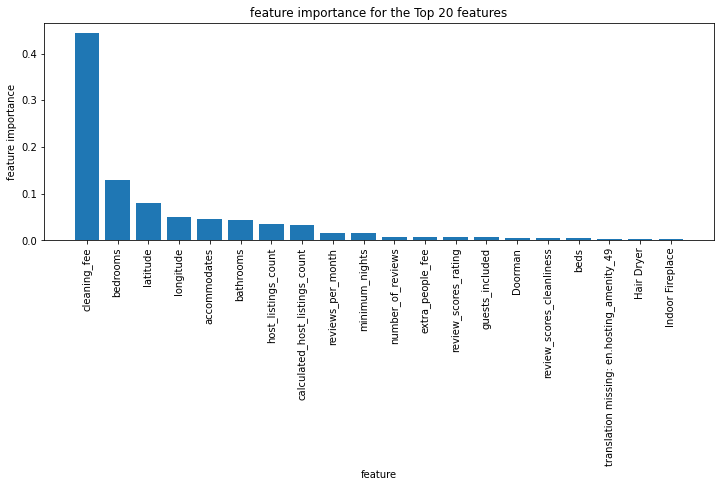

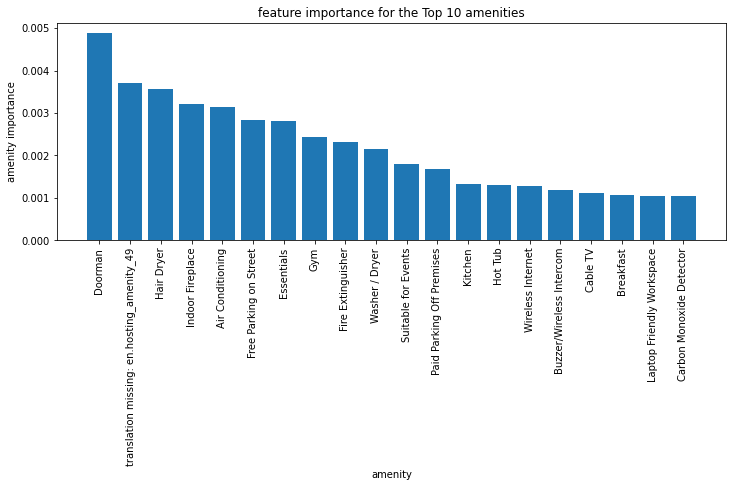

In [40]:
train_list(df_boston,b_possible_amenities)

Training set has 491068 samples.
Testing set has 122767 samples.
------------------
Fitting 3 folds for each of 60 candidates, totalling 180 fits
{'classifier': GradientBoostingRegressor(max_depth=20, n_estimators=250, random_state=42), 'classifier__learning_rate': 0.1, 'classifier__max_depth': 20, 'classifier__n_estimators': 250}
------------------
Train Accuracy
Mean Absolute Error (MAE) : 13.838390352216608
Mean Squared Error (MSE): 820.7395451088255
Root Mean Square Error (RMSE) : 28.648552234080267
R2 Score: 0.8909097475349881
------------------
Test Accuracy
Mean Absolute Error (MAE) : 13.909741329208735
Mean Squared Error (MSE): 823.2418033188804
Root Mean Square Error (RMSE) : 28.692190632973293
R2 Score: 0.8897139053790517
------------------


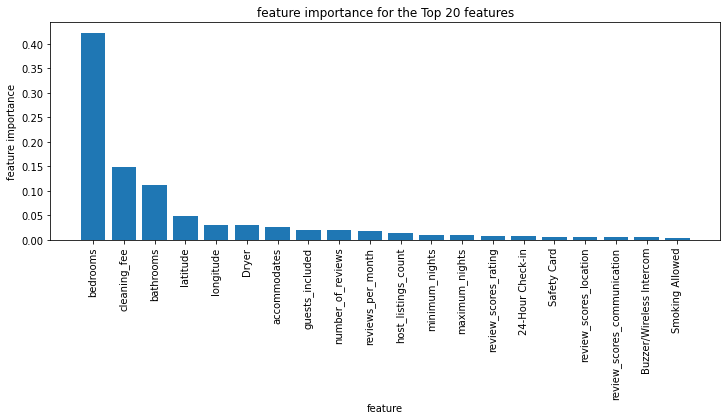

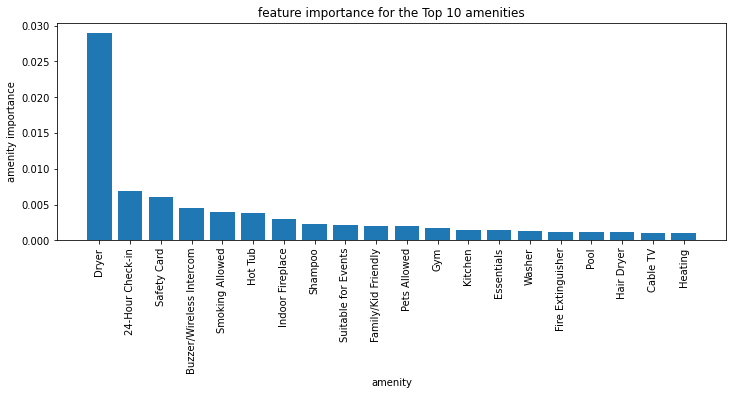

In [41]:
train_list(df_seattle,s_possible_amenities)